# CS412 - Machine Learning - 2020
## Homework 1
100 pts


## Goal

The goal of this homework is three-fold:

*   Introduction to the machine learning experimental set up 
*   Gain experience with Decision tree approache
*   Gain experience with the Scikit library

## Dataset
**MNIST** is a collection of 28x28 grayscale images of digits (0-9); hence each pixel is a gray-level from 0-255. 

**Download the data from Keras. You must use a 20% of the training data for validation** (no need for cross-validation as you have plenty of data) and **use the official test data (10,000 samples) only for testing.**

## Task 
Build a decision tree classifier with the scikit library function calls to classify digits in the MNIST dataset.

## Software: You may find the necessary function references here:
http://scikit-learn.org/stable/supervised_learning.html

## Submission: 
Fill this notebook and submit this document with a link to #your Colab notebook 
(make sure to include the link obtained from the #share link on top right)


##1) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.


## 2) Load training dataset

*  Read from Keras library.



In [ ]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow import keras

# Read data 
#1
#data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
#mnist_df = pd.DataFrame(data)
#mnist_df.head()

#2
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

n, nx, ny = x_test.shape
x_test = x_test.reshape((n,nx*ny))
n, nx, ny = x_train.shape
x_train = x_train.reshape((n,nx*ny))


#train_df = pd.DataFrame(x_train)
#train_df['label'] = y_train

#3
#mnist.load_data()
train_df = pd.read_csv('/content/sample_data/mnist_train_small.csv')
train_df.head()



11493376/11490434 [==============================] - 0s 0us/step


,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##3) Understanding the dataset

There are alot of functions that can be used to know more about this dataset

- What is the shape of the training set (num of samples X number of attributes) ***[shape function can be used]***

- Display attribute names ***[columns function can be used]***

- Display the first 5 rows from training dataset ***[head or sample functions can be used]***

Note: Understanding the features, possibly removing some features etc. is an important part in building an ML system, but for this homework this is not really necessary as  the features are homogeneous (pixels) and all necessary.


In [ ]:
# print shape
print('Data Dimensionality: ')
shape = train_df.shape
print(shape)

#print columns
print('Attribute names: ')
names = train_df.columns
print(names)

# print first 5 rows in your dataset
print('Head of Data: ')
train_df.head()



Data Dimensionality: 
(19999, 785)
Attribute names: 
Index(['6', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.581', '0.582', '0.583', '0.584', '0.585', '0.586', '0.587', '0.588',
       '0.589', '0.590'],
      dtype='object', length=785)
Head of Data: 


,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##4) Shuffle and Split TRAINING data as train (also called development) (80%) and validation (20%) 

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Shuffle the training data
train_df = shuffle(train_df)
train_df.head()




# Split 80-20
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state = 42)
#y_train1


 

##5) Train a decision tree classifier on development/train data and do model selection using the validation data

* Train 3 decision tree classifiers with different values of "min_samples_split" which is the minimum number of samples required to split an internal node:  min_samples_split = [default = 2, 5, 10]. 
* Test the 3 models on validation set and choose the best one.
* Plot the train and validation set errors for those 3 settings - on one plot. 


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Train decision tree classifiers
clsf_A = DecisionTreeClassifier(min_samples_split=2)
clsf_A.fit(X_train, Y_train)

clsf_B = DecisionTreeClassifier(min_samples_split=5)
clsf_B.fit(X_train, Y_train)

clsf_C = DecisionTreeClassifier(min_samples_split=10)
clsf_C.fit(X_train, Y_train)



# Evaluate on validation set
y1 = clsf_A.predict(X_valid)
y2 = clsf_B.predict(X_valid)
y3 = clsf_C.predict(X_valid)

ya = clsf_A.predict(X_train)
yb = clsf_B.predict(X_train)
yc = clsf_C.predict(X_train)
# Plot errors
print('Train set Accuracy scores: ')
train_accuracy1 = accuracy_score(Y_train,ya)
train_accuracy2 = accuracy_score(Y_train,yb)
train_accuracy3 = accuracy_score(Y_train,yc)
trainaccuracies= [train_accuracy1, train_accuracy2, train_accuracy2]
print(train_accuracy1)
print(train_accuracy2)
print(train_accuracy3)


print('Validation set Accuracy scores: ')
val_accuracy1 = accuracy_score(Y_valid,y1)
val_accuracy2 = accuracy_score(Y_valid,y2)
val_accuracy3 = accuracy_score(Y_valid,y3)
valaccuracies= [val_accuracy1, val_accuracy2, val_accuracy3]
print(val_accuracy1)
print(val_accuracy2)
print(val_accuracy3)

Train set Accuracy scores: 
1.0
0.9828333333333333
0.9669166666666666
Validation set Accuracy scores: 
0.8661666666666666
0.8643333333333333
0.8654166666666666


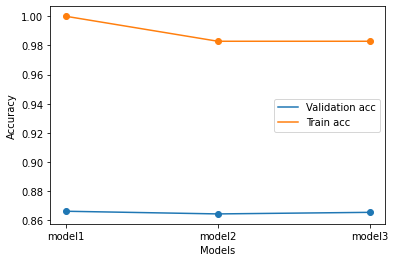

In [ ]:
import matplotlib.pyplot as plt
x_axis = ['model1', 'model2', 'model3']
plt.scatter(x_axis, valaccuracies)
plt.scatter(x_axis, trainaccuracies)
plt.plot(x_axis, valaccuracies, label = "Validation acc")
plt.plot(x_axis, trainaccuracies, label = "Train acc")
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 7) Test your CHOSEN classifier on Test set

- Load test data
- Apply same pre-processing as training data (probably none)
- Predict the labels of testing data **using the best chosen SINGLE model out of the models that you have tried from step 6 (you have selected your model according to your validation results)** and report the accuracy. 

In [ ]:
import pandas as pd
import keras.datasets.mnist as mnist 
# Load test data


#mnist.load_data()
test_df = pd.read_csv('/content/sample_data/mnist_test.csv')
test_df.head()

# test prediction using a decision tree with all default parameters and ..... min-split value 
prediction = clsf_A.predict(x_test)


# Report your accuracy
print('Accuracy score: ')
print(accuracy_score(y_test,prediction))



Accuracy score: 
0.876


##8) Notebook & Report 

**Notebook: We may just look at your notebook results; so make sure each cell is run and  outputs are there.**

**Report: Write an at most 1/2 page summary of your approach to this problem at the end of your notebook**; this should be like an abstract of a paper or the executive summary (you aim for clarity and passing on information, not going to details about known facts such as what dec. trees are or what MNIST is, assuming they are known to people in your research area). 

**Must include statements such as:**

 ( Include the problem definition: 1-2 lines )
 
  (Talk about train/val/test sets, size and how split. )
 
  (Talk about any preprocessing you do.)
  
 ( Give the validation accuracies for different approaches, parameters **in a table** and state which one you selected)
 
 ( State  what your test results are with the chosen method, parameters: e.g. "We have obtained the best results with the ….. classifier      (parameters=....) , giving classification accuracy of …% on test data….""

  (Comment on the speed of the algorithms and anything else that you deem important/interesting (e.g. confusion matrix)).

*You will get full points from here as long as you have a good (enough) summary of your work, regardless of your best performance or what you have decided to talk about in the last few lines.*


**Report**

The goal was to recognize hand-written numbers in an image. Mnist dataset provides train and test sets in order to develop a machine learning model that accomplishes this goal. Train set was used for training the model. Then the training test was divided into two as train and validation sets in 80-20 ratio (20% as validation). Therefore before moving on to the testing part, we were able to test our model in validation set, decide on the best model by determining the highest accuracy model and apply it to the test set as doublechecking. No preprocessing was needed in this case since train and test values were already provided.
3 decision tree models were tried with 3 different min_sample_split values(2,5 and 10). Those models gave accuracies of 8.66,8.64 and 8.65 as in order. The one with min_sample_split value = 2 gave the highest accuracy score (8.66) therefore the first model was picked to predict on test case. 
Also the accuracy score was calculated on the train set too, which was obviously 1 since we predicted on the same data we trained on. Since predicting on the set we trained won't actually show how well our model has learnt, we predicted on the validation set which gave us the correct accuracy score.

##9) Submission

Please submit your **"share link" INLINE in Sucourse submissions**. That is we should be able to click on the link and go there and run (and possibly also modify) your code. 

For us to be able to modify, in case of errors etc, **you should get your "share link" as **share with anyone in edit mode** 

 **Also submit your notebook as pdf as attachment**, choose print and save as PDF, save with hw1-lastname-firstname.pdf to facilitate grading. 


## Questions? 

You can and should ask all your Google Colab related questions under Forums  and feel free to answer/share your answer regarding Colab. 

You can also ask/answer about which functions to use and what libraries... 

However you should **not ask** about the core parts, that is what is validation/test, which one shd. have higher performance, what are your scores etc.
